In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read only the first 1000 rows
df = pd.read_csv('data/southeast.csv', nrows=15000)
df['Data'] = pd.to_datetime(df['Data'])

display(df)

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-07,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
1,1,2000-05-07,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
2,2,2000-05-07,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
3,3,2000-05-07,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
4,4,2000-05-07,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,9259,2001-09-19,19:00,0.0,1016.6,1016.6,1016.4,1660,25.6,13.0,...,139,9.4,2.9,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
14996,9260,2001-09-19,20:00,0.0,1017.0,1017.1,1016.6,334,23.6,13.2,...,148,5.9,1.7,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
14997,9261,2001-09-19,21:00,0.0,1017.5,1017.5,1017.0,136,22.1,13.3,...,114,4.1,0.9,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
14998,9262,2001-09-19,22:00,0.0,1017.7,1017.8,1017.5,-9999,20.4,14.4,...,235,2.9,1.5,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0


In [8]:
df.columns

Index(['index', 'Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

In [9]:
describer = df.describe()
describer

,index,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",latitude,longitude,height
count,15000.000000,15000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000
mean,3956.946400,2001-03-10 20:00:23.040000,-1521.072200,-680.310167,-895.25686,-895.679893,-4950.618133,-1504.137833,-1508.987807,-1704.055020,...,-1709.642047,-1658.958067,-1665.715133,-1461.918533,-1588.896067,-1757.685560,-1539.979307,-22.712318,-44.743892,158.58720
min,0.000000,2000-05-07 00:00:00,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-22.800000,-49.028889,33.00000
25%,1874.750000,2000-10-10 00:00:00,0.000000,941.200000,940.70000,940.200000,-9999.000000,17.700000,13.300000,17.700000,...,12.400000,49.000000,42.000000,48.000000,16.000000,1.800000,0.600000,-22.800000,-43.683333,33.00000
50%,3749.500000,2001-03-15 00:00:00,0.000000,1008.800000,1008.60000,1008.100000,-9999.000000,21.900000,17.000000,22.300000,...,16.500000,73.000000,66.000000,71.000000,129.000000,3.900000,1.600000,-22.800000,-43.683333,33.00000
75%,5624.250000,2001-08-18 00:00:00,0.000000,1013.700000,1013.70000,1013.200000,943.250000,25.700000,19.700000,26.225000,...,19.300000,90.000000,85.000000,88.000000,244.000000,6.300000,2.800000,-22.800000,-43.683333,33.00000
max,9263.000000,2001-12-31 00:00:00,36.400000,1025.000000,1025.10000,1024.900000,3992.000000,38.200000,26.300000,38.200000,...,25.300000,99.000000,98.000000,98.000000,360.000000,25.000000,10.000000,-22.358056,-43.683333,666.00000
std,2490.125959,NaN,3591.307689,3952.657797,4149.47581,4149.283100,5694.190679,3602.202740,3600.144841,3786.052934,...,3783.501570,3803.998366,3803.588884,3620.142481,3854.414264,3811.563038,3611.960077,0.176251,2.131852,252.44564


In [10]:
X = df[['Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'state', 
       'latitude', 'longitude', 'height']]

In [11]:
y = df[['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']]

In [12]:
numeric_features = X.describe().columns

In [13]:
states_list = list(X['state'].unique())
encoder = lambda x: states_list.index(x)

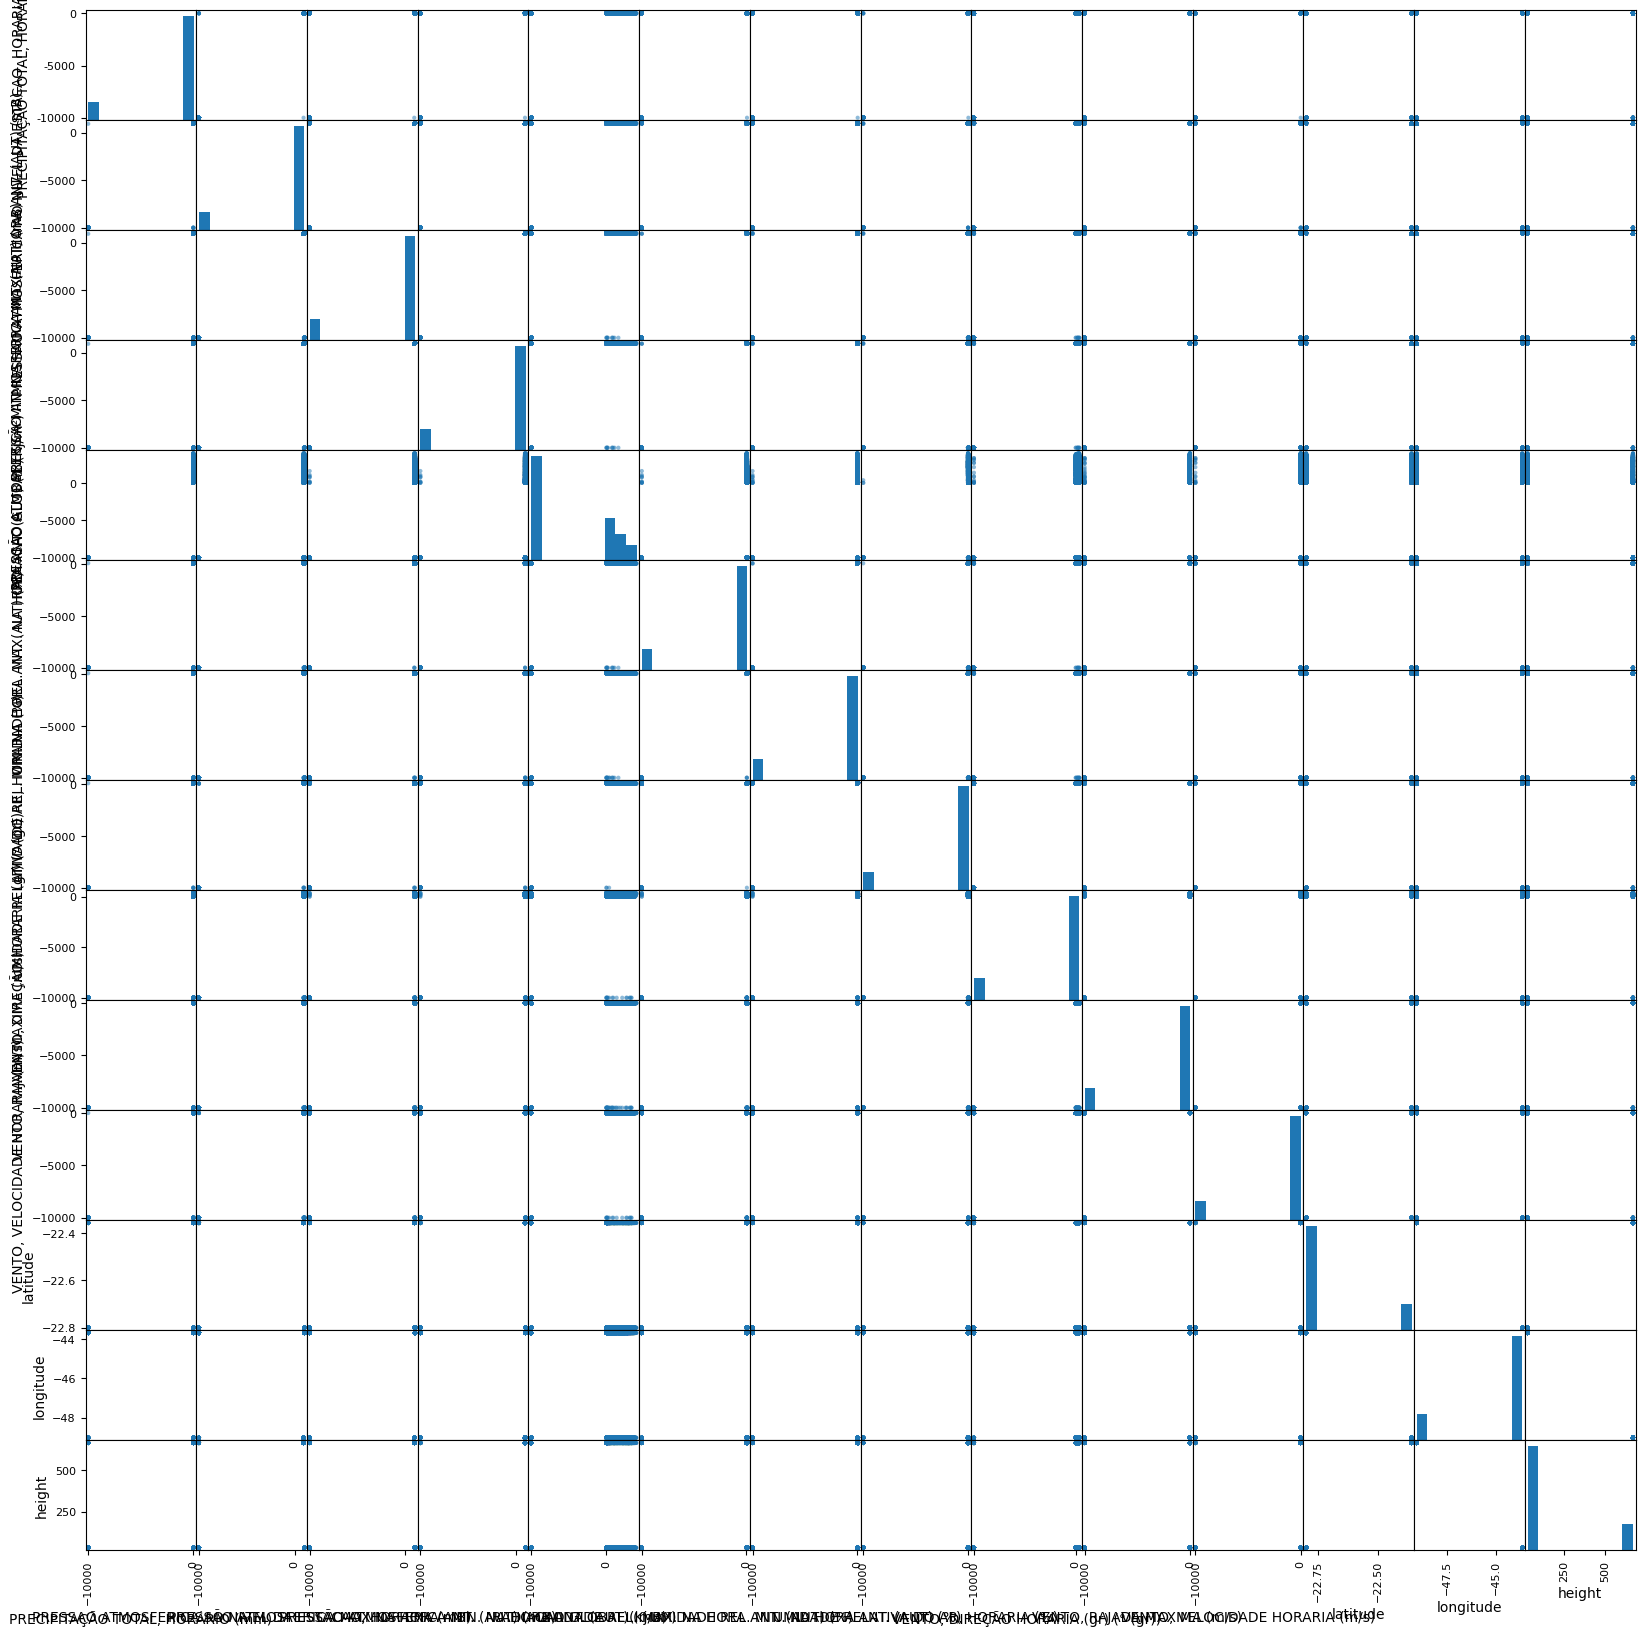

In [16]:
pd.plotting.scatter_matrix(X[numeric_features],  figsize = (20, 20))
plt.show()
